In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import os


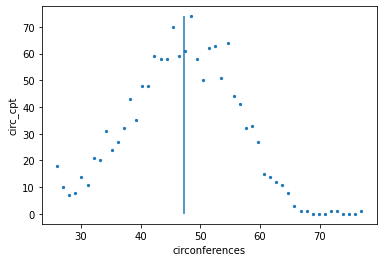

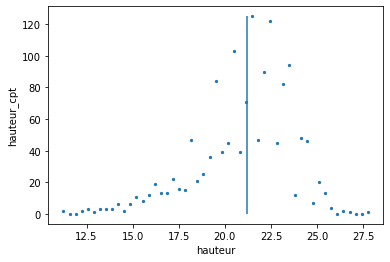

In [2]:
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

max_c = np.amax(circs)
min_c = np.amin(circs)
max_h = np.amax(hauteurs)
min_h = np.amin(hauteurs)

pas = 50

# circs
circs_cpt = np.zeros(pas+1)
diff_c = max_c - min_c
axis_x = min_c + np.arange(0,pas+1)*diff_c/pas
for c in circs:
    index = int((c - min_c)*pas/diff_c)
    circs_cpt[index] += 1

plt.scatter(axis_x, circs_cpt,s=5)
plt.vlines(x = np.mean(circs), ymin = 0, ymax = np.amax(circs_cpt)) 
plt.ylabel("circ_cpt");
plt.xlabel("circonferences")
plt.show()


# hauteurs
hauteurs_cpt = np.zeros(pas+1)
diff_h = max_h - min_h
axis_h = min_h + np.arange(0,pas+1)*diff_h/pas
for h in hauteurs:
    index = int((h - min_h)*pas/diff_h)
    hauteurs_cpt[index] += 1

plt.scatter(axis_h, hauteurs_cpt,s=5)
plt.vlines(x = np.mean(hauteurs), ymin = 0, ymax = np.amax(hauteurs_cpt)) 
plt.ylabel("hauteur_cpt");
plt.xlabel("hauteur")
plt.show()


In [3]:
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

xi = 0.0
yi = 0.0
xi2 = 0.0
xiyi= 0.0
circs = np.empty([0])
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    xi += c
    yi += h
    xiyi += c*h
    xi2 += c**2
    circs = np.append(circs,c)
    hauteurs = np.append(hauteurs,h)

file.close()


beta1: 9.037475668452768, beta2: 0.257137855007109


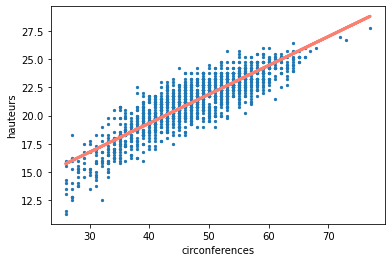

Moyenne de espilon: 5.071753607244942e-16


In [4]:
# Question 3
n = circs.size
beta1 = (xi2*yi - xi*xiyi)/(n*xi2-xi**2)
beta2 = (n*xiyi - xi*yi)/(n*xi2-xi**2)
print(f"beta1: {beta1}, beta2: {beta2}")

y = beta1+beta2*circs

plt.scatter(circs, hauteurs,s=5)
plt.plot(circs, y, color='salmon', linewidth=3)
plt.xlabel("circonferences");
plt.ylabel("hauteurs")
plt.show()

print(f"Moyenne de espilon: {np.sum(y-hauteurs)/n}")


In [5]:
#Q7
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0,3], float)
circs1 = np.empty([0,2], float)
circs2 = np.empty([0,5], float)
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs  = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)     # regression multiple ordre 2
    circs1 = np.append(circs1,[(1.0,c)],axis=0)               # regression simple
    circs2  = np.append(circs2,[(1.0,c,c*c,c*c*c, c*c*c*c)],axis=0) #regression multiple ordre 5
    hauteurs = np.append(hauteurs,h)

file.close()


In [6]:
def calcule_beta(X, Y):
    XT = X.transpose()
    A = np.matmul(XT,X)
    A_inv = np.linalg.inv(A)
    B = np.matmul(XT,Y)
    beta = np.matmul(A_inv,B)
    return beta

print(f"Beta: {calcule_beta(circs, hauteurs)}")
print(f"Beta: {calcule_beta(circs1, hauteurs)}") # meme resultats que la regression lineaire simple 

Beta: [-24.35200327  -0.48294547   9.98688814]
Beta: [9.03747567 0.25713786]


Beta multiple: [-24.35200327  -0.48294547   9.98688814]
Beta simple: [9.03747567 0.25713786]
Beta: [-1.37751974e+01  1.65458337e+00 -2.83383044e-02  2.11645553e-04
 -3.99235027e-07]


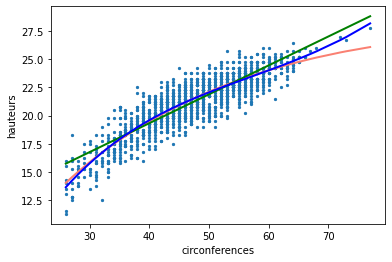

Moyenne de espilon: -3.603610217941441e-11
risque quadratique: 19.492804231375466
Moyenne de espilon: 1.0692449957862278e-13
risque quadratique: 19.32298986873724
Moyenne de espilon: -5.0194407958261004e-09
risque quadratique: 19.590123957327705


In [10]:
# Question 7
beta = calcule_beta(circs, hauteurs)
# Tri par hauteurs pour tracer proprement la courbe
circs_sort = circs[circs[:, 1].argsort()]
y = beta[0]+beta[1]*circs_sort[:,[1]]+beta[2]*circs_sort[:,[2]]

beta1 = calcule_beta(circs1, hauteurs)
# Tri par hauteurs pour tracer proprement la courbe
circs1_sort = circs1[circs1[:, 1].argsort()]
y1 = beta1[0]+beta1[1]*circs1_sort[:,[1]]

beta2 = calcule_beta(circs2, hauteurs)
# Tri par hauteurs pour tracer proprement la courbe
circs2_sort = circs2[circs2[:, 1].argsort()]
y2 = beta2[0]+beta2[1]*circs2_sort[:,[1]]+beta2[2]*circs2_sort[:,[2]]+beta2[3]*circs2_sort[:,[3]]+beta2[4]*circs2_sort[:,[4]]

print(f"Beta multiple: {beta}")
print(f"Beta simple: {beta1}") # meme resultats que la regression lineaire simple 
print(f"Beta: {beta2}") # meme resultats que la regression lineaire simple 

plt.scatter(circs[:,[1]], hauteurs,s=5)
plt.plot(circs_sort[:,[1]], y, color='salmon', linewidth=2)   # regression lineaire multiple
plt.plot(circs1_sort[:,[1]], y1, color='green', linewidth=2)  # regression lineaire simple
plt.plot(circs2_sort[:,[1]], y2, color='blue', linewidth=2)  # regression lineaire multiple
plt.xlabel("circonferences")
plt.ylabel("hauteurs")
plt.show()

#n = hauteurs.size
res = 0
for i in range(hauteurs.size):
    h = beta[0] + beta[1]*circs[i,1] + beta[2]*circs[i,2]
    res = res + np.power(hauteurs[i] - h,2) 
res1 = 0
for i in range(hauteurs.size):
    h1 = beta1[0] + beta1[1]*circs1[i,1]
    res1 = res1 + np.power(hauteurs[i] - h1,2) 
res2 = 0
for i in range(hauteurs.size):
    h2 = beta2[0] + beta2[1]*circs2[i,1] + beta2[2]*circs2[i,2] + beta2[3]*circs2[i,3] + beta2[4]*circs2[i,4]
    res2 = res2 + np.power(hauteurs[i] - h2,2) 

print(f"Moyenne de espilon: {(np.sum(y)-np.sum(hauteurs))/n}")
print(f"risque quadratique: {h}")
print(f"Moyenne de espilon: {(np.sum(y1)-np.sum(hauteurs))/n}")
print(f"risque quadratique: {h1}")
print(f"Moyenne de espilon: {(np.sum(y2)-np.sum(hauteurs))/n}")
print(f"risque quadratique: {h2}")


In [ ]:
# Question 11
# lecture fichier Eucalypcus
file = open(os.getcwd()+"\\Eucaliptus.csv")
csvreader = csv.reader(file)
next(csvreader)

circs = np.empty([0,3], float)
circs1 = np.empty([0,2], float)
circs2 = np.empty([0,5], float)
hauteurs = np.empty([0])

for row in csvreader:
    c = float(row[1])
    h = float(row[2])
    circs  = np.append(circs,[(1.0,c,np.sqrt(c))],axis=0)     # regression multiple ordre 2
    circs1 = np.append(circs1,[(1.0,c)],axis=0)               # regression simple
    circs2  = np.append(circs2,[(1.0,c,c*c,c*c*c, c*c*c*c)],axis=0) #regression multiple ordre 5
    hauteurs = np.append(hauteurs,h)

file.close()


In [ ]:
def calcul_sigma(X, Y, beta):
    res = 0
    for i in range(Y.size):
        h = beta[0] + beta[1]*X[i,1] + beta[2]*X[i,2]
        res = res + np.power(Y[i] - h,2) 
    return np.sqrt(res/(Y.size+1-3))

def calcul_m3(X):
    XT = X.transpose()
    A = np.matmul(XT,X)
    A_inv = np.linalg.inv(A)
    return np.sqrt(A_inv[2,2])

In [ ]:
beta = calcule_beta(circs, hauteurs)
sigma = calcul_sigma(circs, hauteurs, beta)
m3 = calcul_m3(circs)
T = beta[2] / (m3*sigma)

print(f"{sigma} {m3} {beta[2]} {T}")

